<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Proximal%20Policy%20Optimization%20(PPO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proximal Policy Optimization (PPO)
---
In this notebook, you will implement a PPO agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
!pip install swig

In [2]:
!pip install stable_baselines3 gymnasium gymnasium[box2d]

In [3]:
import gymnasium
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import torch
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot

In [4]:
print("Python Version: {}".format(platform.python_version()))
print("Is Cuda Available: {}".format(torch.cuda.is_available()))
print("Torch Version: {}".format(torch.__version__))
print("Cuda Version: {}".format(torch.version.cuda))
print("Scipy Version: {}".format(scipy.__version__))
print("Numpy Version: {}".format(numpy.__version__))
print("Stable Baseline Version: {}".format(stable_baselines3.__version__))
print("IPython Version: {}".format(IPython.__version__))
print("Gymnasium Version: {}".format(gymnasium.__version__))

Python Version: 3.10.12
Is Cuda Available: True
Torch Version: 2.3.1+cu121
Cuda Version: 12.1
Scipy Version: 1.13.1
Numpy Version: 1.26.4
Stable Baseline Version: 2.3.2
IPython Version: 7.34.0
Gymnasium Version: 0.29.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
env = gymnasium.make('LunarLanderContinuous-v2')
print("Observation Space Size: ", env.observation_space.shape)
print("Action Space Size: ", env.action_space.shape)
env.close()

Observation Space Size:  (8,)
Action Space Size:  (2,)


In [6]:
#env = gymnasium.make("LunarLander-v2", continuous=True)
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

#env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
env_val = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

eval_callback = EvalCallback(env_val,
                             best_model_save_path="./logs/",
                             log_path="./logs/",
                             eval_freq=1000,
                             render=False,
                             n_eval_episodes=20)

# Initialize PPO
model = PPO('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=300000,  progress_bar=True, callback=eval_callback)

# Save the model
model.save("ppo_lunar_lander_continous")

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=20)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

Episode length: 92.50 +/- 20.33

New best mean reward!

Eval num_timesteps=2000, episode_reward=-202.40 +/- 113.26

Episode length: 97.20 +/- 24.23

New best mean reward!

Eval num_timesteps=3000, episode_reward=-127.81 +/- 19.88

Episode length: 65.10 +/- 7.16

New best mean reward!

Eval num_timesteps=4000, episode_reward=-161.82 +/- 63.13

Episode length: 78.80 +/- 11.40

Eval num_timesteps=5000, episode_reward=-135.04 +/- 53.42

Episode length: 70.80 +/- 15.97

Eval num_timesteps=6000, episode_reward=-144.46 +/- 48.14

Episode length: 70.20 +/- 13.81

Eval num_timesteps=7000, episode_reward=-152.56 +/- 91.23

Episode length: 96.20 +/- 48.60

Eval num_timesteps=8000, episode_reward=-185.22 +/- 108.37

Episode length: 94.50 +/- 33.31

Eval num_timesteps=9000, episode_reward=-132.14 +/- 21.35

Episode length: 67.70 +/- 12.41

Eval num_timesteps=10000, episode_reward=-129.90 +/- 22.57

Episode length: 63.30 +/- 10.92

Eval num_timesteps=11000, episode_reward=-151.05 +/- 101.00

Episode length: 106.60 +/- 50.51

Eval num_timesteps=12000, episode_reward=-162.92 +/- 131.51

Episode length: 102.60 +/- 8.94

Eval num_timesteps=13000, episode_reward=-193.10 +/- 69.71

Episode length: 118.20 +/- 28.45

Eval num_timesteps=14000, episode_reward=-166.53 +/- 136.29

Episode length: 116.90 +/- 40.35

Eval num_timesteps=15000, episode_reward=-176.43 +/- 105.61

Episode length: 129.80 +/- 39.54

Eval num_timesteps=16000, episode_reward=-129.42 +/- 170.63

Episode length: 193.20 +/- 145.79

Eval num_timesteps=17000, episode_reward=-149.65 +/- 56.83

Episode length: 179.30 +/- 99.36

Eval num_timesteps=18000, episode_reward=-180.83 +/- 35.13

Episode length: 136.80 +/- 49.01

Eval num_timesteps=19000, episode_reward=-137.10 +/- 131.07

Episode length: 159.00 +/- 86.91

Eval num_timesteps=20000, episode_reward=-169.94 +/- 27.65

Episode length: 131.90 +/- 27.73

Eval num_timesteps=21000, episode_reward=-124.59 +/- 84.45

Episode length: 237.50 +/- 156.29

New best mean reward!

Eval num_timesteps=22000, episode_reward=-129.55 +/- 110.20

Episode length: 264.10 +/- 170.76

Eval num_timesteps=23000, episode_reward=-161.30 +/- 72.19

Episode length: 238.30 +/- 256.04

Eval num_timesteps=24000, episode_reward=-194.84 +/- 23.22

Episode length: 179.30 +/- 59.15

Eval num_timesteps=25000, episode_reward=-171.94 +/- 66.84

Episode length: 199.40 +/- 100.93

Eval num_timesteps=26000, episode_reward=-195.19 +/- 42.47

Episode length: 214.80 +/- 128.41

Eval num_timesteps=27000, episode_reward=-129.08 +/- 133.09

Episode length: 318.40 +/- 286.34

Eval num_timesteps=28000, episode_reward=-155.82 +/- 41.68

Episode length: 219.80 +/- 122.98

Eval num_timesteps=29000, episode_reward=-186.76 +/- 34.25

Episode length: 198.80 +/- 88.96

Eval num_timesteps=30000, episode_reward=-164.41 +/- 37.42

Episode length: 206.10 +/- 61.62

Eval num_timesteps=31000, episode_reward=-192.18 +/- 26.69

Episode length: 222.20 +/- 135.43

Eval num_timesteps=32000, episode_reward=-190.05 +/- 46.92

Episode length: 272.20 +/- 142.13

Eval num_timesteps=33000, episode_reward=-187.48 +/- 38.83

Episode length: 300.30 +/- 182.46

Eval num_timesteps=34000, episode_reward=-188.37 +/- 31.22

Episode length: 211.50 +/- 92.82

Eval num_timesteps=35000, episode_reward=-228.54 +/- 48.99

Episode length: 439.90 +/- 253.47

Eval num_timesteps=36000, episode_reward=-189.64 +/- 50.83

Episode length: 340.90 +/- 255.54

Eval num_timesteps=37000, episode_reward=-210.97 +/- 50.14

Episode length: 226.10 +/- 82.82

Eval num_timesteps=38000, episode_reward=-245.28 +/- 92.84

Episode length: 294.40 +/- 166.79

Eval num_timesteps=39000, episode_reward=-264.37 +/- 56.42

Episode length: 287.40 +/- 64.28

Eval num_timesteps=40000, episode_reward=-239.77 +/- 49.41

Episode length: 319.40 +/- 188.29

Eval num_timesteps=41000, episode_reward=-244.47 +/- 50.95

Episode length: 295.00 +/- 96.16

Eval num_timesteps=42000, episode_reward=-289.45 +/- 82.53

Episode length: 322.80 +/- 135.49

Eval num_timesteps=43000, episode_reward=-289.04 +/- 94.78

Episode length: 348.00 +/- 230.25

Eval num_timesteps=44000, episode_reward=-320.92 +/- 70.09

Episode length: 458.30 +/- 194.20

Eval num_timesteps=45000, episode_reward=-256.60 +/- 49.53

Episode length: 298.50 +/- 122.80

Eval num_timesteps=46000, episode_reward=-210.04 +/- 34.34

Episode length: 266.80 +/- 51.82

Eval num_timesteps=47000, episode_reward=-232.35 +/- 39.48

Episode length: 281.20 +/- 98.12

Eval num_timesteps=48000, episode_reward=-243.18 +/- 99.25

Episode length: 353.00 +/- 206.19

Eval num_timesteps=49000, episode_reward=-258.08 +/- 56.22

Episode length: 382.00 +/- 152.75

Eval num_timesteps=50000, episode_reward=-236.25 +/- 31.34

Episode length: 397.10 +/- 99.49

Eval num_timesteps=51000, episode_reward=-225.94 +/- 46.38

Episode length: 415.30 +/- 133.76

Eval num_timesteps=52000, episode_reward=-288.31 +/- 58.76

Episode length: 459.60 +/- 133.09

Eval num_timesteps=53000, episode_reward=-225.89 +/- 54.92

Episode length: 377.30 +/- 229.87

Eval num_timesteps=54000, episode_reward=-257.96 +/- 44.93

Episode length: 421.90 +/- 121.52

Eval num_timesteps=55000, episode_reward=-231.03 +/- 54.68

Episode length: 622.40 +/- 259.17

Eval num_timesteps=56000, episode_reward=-259.68 +/- 37.98

Episode length: 720.40 +/- 223.37

Eval num_timesteps=57000, episode_reward=-298.67 +/- 77.48

Episode length: 651.00 +/- 199.29

Eval num_timesteps=58000, episode_reward=-259.30 +/- 67.03

Episode length: 646.80 +/- 194.58

Eval num_timesteps=59000, episode_reward=-277.06 +/- 93.08

Episode length: 644.70 +/- 269.13

Eval num_timesteps=60000, episode_reward=-272.87 +/- 64.30

Episode length: 619.40 +/- 232.74

Eval num_timesteps=61000, episode_reward=-288.71 +/- 98.29

Episode length: 630.00 +/- 221.78

Eval num_timesteps=62000, episode_reward=-296.28 +/- 53.13

Episode length: 693.20 +/- 245.27

Eval num_timesteps=63000, episode_reward=-223.35 +/- 67.09

Episode length: 627.90 +/- 279.90

Eval num_timesteps=64000, episode_reward=-324.52 +/- 65.50

Episode length: 604.60 +/- 123.57

Eval num_timesteps=65000, episode_reward=-305.67 +/- 67.62

Episode length: 703.90 +/- 213.96

Eval num_timesteps=66000, episode_reward=-260.09 +/- 84.99

Episode length: 900.60 +/- 151.17

Eval num_timesteps=67000, episode_reward=-240.45 +/- 55.83

Episode length: 900.80 +/- 162.26

Eval num_timesteps=68000, episode_reward=-304.52 +/- 60.21

Episode length: 789.80 +/- 211.99

Eval num_timesteps=69000, episode_reward=-305.76 +/- 116.06

Episode length: 824.30 +/- 158.87

Eval num_timesteps=70000, episode_reward=-276.56 +/- 100.13

Episode length: 920.00 +/- 127.73

Eval num_timesteps=71000, episode_reward=-272.60 +/- 89.64

Episode length: 908.30 +/- 127.40

Eval num_timesteps=72000, episode_reward=-180.19 +/- 39.21

Episode length: 959.60 +/- 80.88

Eval num_timesteps=73000, episode_reward=-167.91 +/- 23.66

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=74000, episode_reward=-54.94 +/- 39.14

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=75000, episode_reward=-31.79 +/- 38.50

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=76000, episode_reward=-49.43 +/- 31.76

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=77000, episode_reward=-56.50 +/- 34.90

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=78000, episode_reward=-21.67 +/- 13.59

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=79000, episode_reward=-71.11 +/- 68.01

Episode length: 992.90 +/- 17.67

Eval num_timesteps=80000, episode_reward=12.48 +/- 65.34

Episode length: 986.40 +/- 27.21

New best mean reward!

Eval num_timesteps=81000, episode_reward=-9.26 +/- 30.63

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=82000, episode_reward=-4.85 +/- 66.82

Episode length: 980.50 +/- 47.07

Eval num_timesteps=83000, episode_reward=1.79 +/- 74.32

Episode length: 982.10 +/- 44.45

Eval num_timesteps=84000, episode_reward=32.12 +/- 56.85

Episode length: 985.90 +/- 32.14

New best mean reward!

Eval num_timesteps=85000, episode_reward=11.98 +/- 78.40

Episode length: 983.60 +/- 26.46

Eval num_timesteps=86000, episode_reward=24.79 +/- 52.76

Episode length: 998.50 +/- 3.29

Eval num_timesteps=87000, episode_reward=42.52 +/- 110.61

Episode length: 919.50 +/- 81.72

New best mean reward!

Eval num_timesteps=88000, episode_reward=3.97 +/- 114.94

Episode length: 918.90 +/- 84.05

Eval num_timesteps=89000, episode_reward=20.59 +/- 94.58

Episode length: 935.00 +/- 95.52

Eval num_timesteps=90000, episode_reward=29.21 +/- 101.63

Episode length: 863.70 +/- 143.71

Eval num_timesteps=91000, episode_reward=-4.41 +/- 100.04

Episode length: 891.30 +/- 109.90

Eval num_timesteps=92000, episode_reward=-3.08 +/- 97.83

Episode length: 843.00 +/- 173.57

Eval num_timesteps=93000, episode_reward=-31.91 +/- 57.83

Episode length: 965.40 +/- 79.83

Eval num_timesteps=94000, episode_reward=-58.64 +/- 46.30

Episode length: 973.00 +/- 58.11

Eval num_timesteps=95000, episode_reward=33.16 +/- 124.10

Episode length: 830.80 +/- 130.32

Eval num_timesteps=96000, episode_reward=74.88 +/- 120.61

Episode length: 762.80 +/- 166.58

New best mean reward!

Eval num_timesteps=97000, episode_reward=117.16 +/- 58.74

Episode length: 797.80 +/- 180.31

New best mean reward!

Eval num_timesteps=98000, episode_reward=41.89 +/- 79.62

Episode length: 800.60 +/- 199.33

Eval num_timesteps=99000, episode_reward=53.85 +/- 105.64

Episode length: 714.80 +/- 252.69

Eval num_timesteps=100000, episode_reward=41.52 +/- 109.13

Episode length: 648.40 +/- 290.34

Eval num_timesteps=101000, episode_reward=115.71 +/- 72.27

Episode length: 717.60 +/- 139.01

Eval num_timesteps=102000, episode_reward=114.96 +/- 80.56

Episode length: 741.50 +/- 188.36

Eval num_timesteps=103000, episode_reward=133.07 +/- 68.72

Episode length: 774.10 +/- 109.43

New best mean reward!

Eval num_timesteps=104000, episode_reward=82.33 +/- 86.63

Episode length: 882.60 +/- 110.80

Eval num_timesteps=105000, episode_reward=155.49 +/- 55.64

Episode length: 773.80 +/- 94.52

New best mean reward!

Eval num_timesteps=106000, episode_reward=125.75 +/- 77.50

Episode length: 841.70 +/- 105.29

Eval num_timesteps=107000, episode_reward=80.42 +/- 123.59

Episode length: 701.80 +/- 95.17

Eval num_timesteps=108000, episode_reward=91.39 +/- 121.27

Episode length: 693.50 +/- 92.07

Eval num_timesteps=109000, episode_reward=153.86 +/- 66.69

Episode length: 670.80 +/- 78.37

Eval num_timesteps=110000, episode_reward=191.53 +/- 33.91

Episode length: 688.70 +/- 90.60

New best mean reward!

Eval num_timesteps=111000, episode_reward=74.02 +/- 110.66

Episode length: 741.30 +/- 156.79

Eval num_timesteps=112000, episode_reward=72.06 +/- 90.44

Episode length: 737.30 +/- 194.12

Eval num_timesteps=113000, episode_reward=142.04 +/- 83.35

Episode length: 757.10 +/- 155.73

Eval num_timesteps=114000, episode_reward=139.79 +/- 91.05

Episode length: 698.80 +/- 161.11

Eval num_timesteps=115000, episode_reward=137.69 +/- 94.57

Episode length: 623.20 +/- 101.32

Eval num_timesteps=116000, episode_reward=200.44 +/- 14.25

Episode length: 579.90 +/- 70.36

New best mean reward!

Eval num_timesteps=117000, episode_reward=161.70 +/- 76.53

Episode length: 569.70 +/- 105.39

Eval num_timesteps=118000, episode_reward=183.92 +/- 32.11

Episode length: 572.00 +/- 128.52

Eval num_timesteps=119000, episode_reward=127.13 +/- 122.11

Episode length: 472.70 +/- 75.68

Eval num_timesteps=120000, episode_reward=154.22 +/- 92.26

Episode length: 523.90 +/- 147.22

Eval num_timesteps=121000, episode_reward=88.32 +/- 115.22

Episode length: 472.90 +/- 121.60

Eval num_timesteps=122000, episode_reward=162.87 +/- 79.59

Episode length: 541.50 +/- 179.01

Eval num_timesteps=123000, episode_reward=174.46 +/- 70.17

Episode length: 519.40 +/- 66.94

Eval num_timesteps=124000, episode_reward=138.59 +/- 93.75

Episode length: 518.70 +/- 75.36

Eval num_timesteps=125000, episode_reward=119.65 +/- 122.42

Episode length: 471.60 +/- 80.69

Eval num_timesteps=126000, episode_reward=150.68 +/- 93.12

Episode length: 563.30 +/- 139.00

Eval num_timesteps=127000, episode_reward=118.11 +/- 118.48

Episode length: 516.10 +/- 101.25

Eval num_timesteps=128000, episode_reward=98.30 +/- 100.45

Episode length: 424.20 +/- 144.64

Eval num_timesteps=129000, episode_reward=199.20 +/- 20.55

Episode length: 489.40 +/- 82.70

Eval num_timesteps=130000, episode_reward=149.96 +/- 103.41

Episode length: 540.00 +/- 178.93

Eval num_timesteps=131000, episode_reward=102.12 +/- 117.11

Episode length: 532.40 +/- 160.85

Eval num_timesteps=132000, episode_reward=145.35 +/- 104.41

Episode length: 456.50 +/- 92.78

Eval num_timesteps=133000, episode_reward=135.76 +/- 126.74

Episode length: 480.20 +/- 131.24

Eval num_timesteps=134000, episode_reward=191.02 +/- 68.63

Episode length: 448.00 +/- 78.42

Eval num_timesteps=135000, episode_reward=184.40 +/- 75.83

Episode length: 453.50 +/- 57.00

Eval num_timesteps=136000, episode_reward=199.57 +/- 76.44

Episode length: 400.20 +/- 66.06

Eval num_timesteps=137000, episode_reward=152.45 +/- 116.29

Episode length: 382.20 +/- 75.57

Eval num_timesteps=138000, episode_reward=207.42 +/- 72.36

Episode length: 407.00 +/- 57.09

New best mean reward!

Eval num_timesteps=139000, episode_reward=207.47 +/- 62.42

Episode length: 379.60 +/- 50.18

New best mean reward!

Eval num_timesteps=140000, episode_reward=177.19 +/- 97.89

Episode length: 381.50 +/- 56.54

Eval num_timesteps=141000, episode_reward=188.87 +/- 70.54

Episode length: 409.40 +/- 201.31

Eval num_timesteps=142000, episode_reward=199.55 +/- 87.81

Episode length: 433.10 +/- 122.11

Eval num_timesteps=143000, episode_reward=202.44 +/- 84.65

Episode length: 371.00 +/- 43.09

Eval num_timesteps=144000, episode_reward=157.98 +/- 106.45

Episode length: 372.90 +/- 49.70

Eval num_timesteps=145000, episode_reward=108.53 +/- 126.20

Episode length: 328.80 +/- 50.27

Eval num_timesteps=146000, episode_reward=126.63 +/- 115.04

Episode length: 377.80 +/- 215.59

Eval num_timesteps=147000, episode_reward=183.22 +/- 95.68

Episode length: 330.80 +/- 62.51

Eval num_timesteps=148000, episode_reward=202.28 +/- 74.96

Episode length: 370.40 +/- 55.23

Eval num_timesteps=149000, episode_reward=143.93 +/- 97.67

Episode length: 394.90 +/- 117.01

Eval num_timesteps=150000, episode_reward=143.17 +/- 108.03

Episode length: 370.00 +/- 54.38

Eval num_timesteps=151000, episode_reward=194.87 +/- 72.25

Episode length: 384.50 +/- 47.53

Eval num_timesteps=152000, episode_reward=197.92 +/- 69.17

Episode length: 445.20 +/- 82.85

Eval num_timesteps=153000, episode_reward=155.17 +/- 95.95

Episode length: 366.10 +/- 56.26

Eval num_timesteps=154000, episode_reward=155.31 +/- 97.50

Episode length: 414.60 +/- 57.11

Eval num_timesteps=155000, episode_reward=160.76 +/- 66.48

Episode length: 394.30 +/- 65.58

Eval num_timesteps=156000, episode_reward=158.38 +/- 95.09

Episode length: 363.30 +/- 54.33

Eval num_timesteps=157000, episode_reward=174.72 +/- 71.40

Episode length: 390.10 +/- 85.56

Eval num_timesteps=158000, episode_reward=126.25 +/- 130.20

Episode length: 406.70 +/- 65.05

Eval num_timesteps=159000, episode_reward=115.49 +/- 105.29

Episode length: 362.60 +/- 92.36

Eval num_timesteps=160000, episode_reward=190.18 +/- 76.13

Episode length: 366.40 +/- 54.71

Eval num_timesteps=161000, episode_reward=176.89 +/- 82.67

Episode length: 431.00 +/- 70.41

Eval num_timesteps=162000, episode_reward=149.23 +/- 95.03

Episode length: 426.50 +/- 80.83

Eval num_timesteps=163000, episode_reward=110.98 +/- 121.95

Episode length: 400.50 +/- 23.43

Eval num_timesteps=164000, episode_reward=149.83 +/- 112.59

Episode length: 370.40 +/- 85.52

Eval num_timesteps=165000, episode_reward=183.01 +/- 72.78

Episode length: 442.40 +/- 130.19

Eval num_timesteps=166000, episode_reward=101.65 +/- 125.88

Episode length: 357.50 +/- 63.94

Eval num_timesteps=167000, episode_reward=219.52 +/- 22.61

Episode length: 376.70 +/- 46.23

New best mean reward!

Eval num_timesteps=168000, episode_reward=141.16 +/- 96.98

Episode length: 403.10 +/- 124.76

Eval num_timesteps=169000, episode_reward=72.60 +/- 122.76

Episode length: 333.90 +/- 81.17

Eval num_timesteps=170000, episode_reward=117.73 +/- 104.17

Episode length: 441.90 +/- 222.13

Eval num_timesteps=171000, episode_reward=165.55 +/- 108.38

Episode length: 381.50 +/- 32.58

Eval num_timesteps=172000, episode_reward=158.81 +/- 84.33

Episode length: 460.30 +/- 188.27

Eval num_timesteps=173000, episode_reward=194.81 +/- 28.35

Episode length: 409.70 +/- 106.80

Eval num_timesteps=174000, episode_reward=140.57 +/- 119.27

Episode length: 367.30 +/- 94.22

Eval num_timesteps=175000, episode_reward=205.90 +/- 44.65

Episode length: 440.20 +/- 132.81

Eval num_timesteps=176000, episode_reward=97.88 +/- 125.94

Episode length: 374.10 +/- 109.89

Eval num_timesteps=177000, episode_reward=194.00 +/- 75.76

Episode length: 403.10 +/- 96.21

Eval num_timesteps=178000, episode_reward=129.81 +/- 110.85

Episode length: 371.70 +/- 115.81

Eval num_timesteps=179000, episode_reward=148.74 +/- 90.34

Episode length: 431.60 +/- 42.03

Eval num_timesteps=180000, episode_reward=136.26 +/- 105.39

Episode length: 411.70 +/- 51.47

Eval num_timesteps=181000, episode_reward=90.84 +/- 111.08

Episode length: 419.30 +/- 214.21

Eval num_timesteps=182000, episode_reward=129.02 +/- 96.96

Episode length: 362.00 +/- 69.02

Eval num_timesteps=183000, episode_reward=62.67 +/- 135.89

Episode length: 458.70 +/- 96.09

Eval num_timesteps=184000, episode_reward=95.42 +/- 111.94

Episode length: 413.70 +/- 162.59

Eval num_timesteps=185000, episode_reward=132.28 +/- 118.12

Episode length: 469.10 +/- 135.24

Eval num_timesteps=186000, episode_reward=113.32 +/- 138.17

Episode length: 443.70 +/- 82.48

Eval num_timesteps=187000, episode_reward=74.61 +/- 133.40

Episode length: 476.30 +/- 73.16

Eval num_timesteps=188000, episode_reward=10.92 +/- 138.55

Episode length: 462.00 +/- 98.90

Eval num_timesteps=189000, episode_reward=146.31 +/- 107.14

Episode length: 407.50 +/- 109.27

Eval num_timesteps=190000, episode_reward=70.15 +/- 124.03

Episode length: 446.70 +/- 105.56

Eval num_timesteps=191000, episode_reward=140.57 +/- 91.70

Episode length: 410.60 +/- 50.12

Eval num_timesteps=192000, episode_reward=194.99 +/- 28.58

Episode length: 492.20 +/- 143.26

Eval num_timesteps=193000, episode_reward=164.13 +/- 72.00

Episode length: 416.40 +/- 53.95

Eval num_timesteps=194000, episode_reward=62.00 +/- 121.75

Episode length: 417.10 +/- 111.84

Eval num_timesteps=195000, episode_reward=205.77 +/- 31.79

Episode length: 432.90 +/- 52.75

Eval num_timesteps=196000, episode_reward=195.07 +/- 25.74

Episode length: 422.80 +/- 83.69

Eval num_timesteps=197000, episode_reward=81.69 +/- 120.86

Episode length: 372.90 +/- 41.77

Eval num_timesteps=198000, episode_reward=115.19 +/- 114.11

Episode length: 408.00 +/- 59.97

Eval num_timesteps=199000, episode_reward=143.74 +/- 109.34

Episode length: 391.20 +/- 68.20

Eval num_timesteps=200000, episode_reward=112.59 +/- 108.94

Episode length: 442.80 +/- 70.21

Eval num_timesteps=201000, episode_reward=198.03 +/- 25.90

Episode length: 427.00 +/- 57.94

Eval num_timesteps=202000, episode_reward=167.71 +/- 111.26

Episode length: 373.50 +/- 68.63

Eval num_timesteps=203000, episode_reward=161.71 +/- 91.60

Episode length: 413.40 +/- 68.65

Eval num_timesteps=204000, episode_reward=200.00 +/- 18.35

Episode length: 412.10 +/- 62.61

Eval num_timesteps=205000, episode_reward=185.01 +/- 72.42

Episode length: 416.70 +/- 67.19

Eval num_timesteps=206000, episode_reward=196.34 +/- 68.68

Episode length: 455.20 +/- 122.58

Eval num_timesteps=207000, episode_reward=157.07 +/- 99.81

Episode length: 425.40 +/- 98.17

Eval num_timesteps=208000, episode_reward=107.62 +/- 113.40

Episode length: 379.00 +/- 50.80

Eval num_timesteps=209000, episode_reward=153.36 +/- 98.74

Episode length: 435.20 +/- 136.26

Eval num_timesteps=210000, episode_reward=205.50 +/- 59.59

Episode length: 375.50 +/- 46.87

Eval num_timesteps=211000, episode_reward=211.97 +/- 35.12

Episode length: 388.00 +/- 62.20

Eval num_timesteps=212000, episode_reward=189.38 +/- 62.73

Episode length: 354.90 +/- 96.13

Eval num_timesteps=213000, episode_reward=137.96 +/- 118.46

Episode length: 426.90 +/- 165.49

Eval num_timesteps=214000, episode_reward=198.79 +/- 72.91

Episode length: 364.30 +/- 54.10

Eval num_timesteps=215000, episode_reward=188.91 +/- 62.39

Episode length: 325.50 +/- 38.37

Eval num_timesteps=216000, episode_reward=147.67 +/- 101.14

Episode length: 362.10 +/- 83.37

Eval num_timesteps=217000, episode_reward=160.63 +/- 105.48

Episode length: 348.50 +/- 38.00

Eval num_timesteps=218000, episode_reward=176.05 +/- 111.18

Episode length: 353.40 +/- 31.57

Eval num_timesteps=219000, episode_reward=156.38 +/- 86.22

Episode length: 362.60 +/- 49.12

Eval num_timesteps=220000, episode_reward=156.37 +/- 98.20

Episode length: 369.50 +/- 81.97

Eval num_timesteps=221000, episode_reward=160.46 +/- 95.57

Episode length: 401.20 +/- 124.39

Eval num_timesteps=222000, episode_reward=138.60 +/- 113.00

Episode length: 364.40 +/- 56.01

Eval num_timesteps=223000, episode_reward=135.17 +/- 101.04

Episode length: 356.20 +/- 33.45

Eval num_timesteps=224000, episode_reward=137.94 +/- 115.27

Episode length: 321.20 +/- 30.84

Eval num_timesteps=225000, episode_reward=169.10 +/- 85.68

Episode length: 326.40 +/- 52.59

Eval num_timesteps=226000, episode_reward=100.11 +/- 133.07

Episode length: 296.50 +/- 45.12

Eval num_timesteps=227000, episode_reward=206.56 +/- 74.13

Episode length: 343.90 +/- 71.51

Eval num_timesteps=228000, episode_reward=85.61 +/- 117.85

Episode length: 293.80 +/- 41.80

Eval num_timesteps=229000, episode_reward=144.35 +/- 116.51

Episode length: 338.10 +/- 99.86

Eval num_timesteps=230000, episode_reward=170.23 +/- 91.88

Episode length: 343.80 +/- 42.60

Eval num_timesteps=231000, episode_reward=165.82 +/- 99.19

Episode length: 374.80 +/- 68.87

Eval num_timesteps=232000, episode_reward=124.23 +/- 110.10

Episode length: 316.40 +/- 73.43

Eval num_timesteps=233000, episode_reward=110.70 +/- 127.85

Episode length: 290.50 +/- 38.59

Eval num_timesteps=234000, episode_reward=127.09 +/- 120.93

Episode length: 297.40 +/- 57.40

Eval num_timesteps=235000, episode_reward=136.99 +/- 104.82

Episode length: 339.10 +/- 92.78

Eval num_timesteps=236000, episode_reward=129.77 +/- 109.16

Episode length: 284.70 +/- 64.98

Eval num_timesteps=237000, episode_reward=115.89 +/- 108.02

Episode length: 317.60 +/- 90.07

Eval num_timesteps=238000, episode_reward=105.64 +/- 131.91

Episode length: 362.00 +/- 80.01

Eval num_timesteps=239000, episode_reward=207.91 +/- 29.52

Episode length: 381.20 +/- 89.41

Eval num_timesteps=240000, episode_reward=151.41 +/- 118.52

Episode length: 417.30 +/- 212.63

Eval num_timesteps=241000, episode_reward=113.00 +/- 115.70

Episode length: 396.90 +/- 214.21

Eval num_timesteps=242000, episode_reward=73.70 +/- 138.14

Episode length: 383.90 +/- 87.49

Eval num_timesteps=243000, episode_reward=150.24 +/- 91.13

Episode length: 373.70 +/- 102.98

Eval num_timesteps=244000, episode_reward=148.70 +/- 116.58

Episode length: 343.40 +/- 42.32

Eval num_timesteps=245000, episode_reward=200.56 +/- 35.02

Episode length: 392.20 +/- 119.22

Eval num_timesteps=246000, episode_reward=160.59 +/- 102.17

Episode length: 320.00 +/- 52.85

Eval num_timesteps=247000, episode_reward=179.61 +/- 67.82

Episode length: 395.90 +/- 81.16

Eval num_timesteps=248000, episode_reward=122.93 +/- 128.86

Episode length: 317.80 +/- 73.68

Eval num_timesteps=249000, episode_reward=142.10 +/- 103.43

Episode length: 302.20 +/- 71.41

Eval num_timesteps=250000, episode_reward=145.51 +/- 120.66

Episode length: 349.60 +/- 105.61

Eval num_timesteps=251000, episode_reward=217.92 +/- 21.52

Episode length: 354.60 +/- 70.29

Eval num_timesteps=252000, episode_reward=147.05 +/- 99.01

Episode length: 317.50 +/- 52.27

Eval num_timesteps=253000, episode_reward=177.58 +/- 77.85

Episode length: 365.10 +/- 76.51

Eval num_timesteps=254000, episode_reward=187.83 +/- 71.44

Episode length: 397.30 +/- 147.75

Eval num_timesteps=255000, episode_reward=90.00 +/- 127.80

Episode length: 354.60 +/- 72.85

Eval num_timesteps=256000, episode_reward=160.44 +/- 94.31

Episode length: 354.00 +/- 99.64

Eval num_timesteps=257000, episode_reward=163.91 +/- 116.75

Episode length: 369.60 +/- 114.48

Eval num_timesteps=258000, episode_reward=145.35 +/- 90.02

Episode length: 364.90 +/- 78.45

Eval num_timesteps=259000, episode_reward=133.99 +/- 108.28

Episode length: 320.70 +/- 63.74

Eval num_timesteps=260000, episode_reward=169.23 +/- 100.84

Episode length: 338.00 +/- 63.98

Eval num_timesteps=261000, episode_reward=145.88 +/- 110.94

Episode length: 324.70 +/- 96.99

Eval num_timesteps=262000, episode_reward=159.52 +/- 103.88

Episode length: 349.40 +/- 84.84

Eval num_timesteps=263000, episode_reward=120.58 +/- 132.35

Episode length: 358.70 +/- 94.07

Eval num_timesteps=264000, episode_reward=105.34 +/- 138.10

Episode length: 313.00 +/- 69.24

Eval num_timesteps=265000, episode_reward=112.43 +/- 145.74

Episode length: 325.70 +/- 119.05

Eval num_timesteps=266000, episode_reward=89.64 +/- 148.42

Episode length: 372.70 +/- 124.82

Eval num_timesteps=267000, episode_reward=72.51 +/- 114.50

Episode length: 346.70 +/- 85.05

Eval num_timesteps=268000, episode_reward=70.82 +/- 133.08

Episode length: 352.80 +/- 126.78

Eval num_timesteps=269000, episode_reward=208.07 +/- 24.07

Episode length: 340.90 +/- 44.09

Eval num_timesteps=270000, episode_reward=77.43 +/- 143.89

Episode length: 299.70 +/- 41.21

Eval num_timesteps=271000, episode_reward=19.09 +/- 140.89

Episode length: 359.90 +/- 101.64

Eval num_timesteps=272000, episode_reward=121.19 +/- 134.97

Episode length: 320.20 +/- 67.51

Eval num_timesteps=273000, episode_reward=117.33 +/- 129.12

Episode length: 338.40 +/- 96.13

Eval num_timesteps=274000, episode_reward=137.43 +/- 116.82

Episode length: 391.40 +/- 91.29

Eval num_timesteps=275000, episode_reward=62.56 +/- 129.87

Episode length: 317.80 +/- 124.96

Eval num_timesteps=276000, episode_reward=193.53 +/- 87.59

Episode length: 352.90 +/- 61.47

Eval num_timesteps=277000, episode_reward=93.35 +/- 122.22

Episode length: 302.00 +/- 111.83

Eval num_timesteps=278000, episode_reward=99.79 +/- 134.79

Episode length: 332.70 +/- 119.15

Eval num_timesteps=279000, episode_reward=167.81 +/- 114.48

Episode length: 429.50 +/- 103.63

Eval num_timesteps=280000, episode_reward=158.97 +/- 110.23

Episode length: 381.10 +/- 121.96

Eval num_timesteps=281000, episode_reward=173.22 +/- 91.60

Episode length: 349.20 +/- 73.45

Eval num_timesteps=282000, episode_reward=74.83 +/- 158.26

Episode length: 339.00 +/- 88.46

Eval num_timesteps=283000, episode_reward=144.03 +/- 113.72

Episode length: 328.90 +/- 71.37

Eval num_timesteps=284000, episode_reward=124.06 +/- 133.89

Episode length: 349.00 +/- 70.35

Eval num_timesteps=285000, episode_reward=70.11 +/- 147.04

Episode length: 336.40 +/- 84.29

Eval num_timesteps=286000, episode_reward=127.38 +/- 127.40

Episode length: 331.60 +/- 73.52

Eval num_timesteps=287000, episode_reward=176.28 +/- 78.89

Episode length: 406.70 +/- 77.11

Eval num_timesteps=288000, episode_reward=100.56 +/- 136.84

Episode length: 355.80 +/- 83.18

Eval num_timesteps=289000, episode_reward=121.62 +/- 114.49

Episode length: 466.30 +/- 204.40

Eval num_timesteps=290000, episode_reward=53.17 +/- 140.39

Episode length: 319.90 +/- 43.78

Eval num_timesteps=291000, episode_reward=160.21 +/- 99.68

Episode length: 405.70 +/- 70.29

Eval num_timesteps=292000, episode_reward=71.25 +/- 154.54

Episode length: 351.00 +/- 57.93

Eval num_timesteps=293000, episode_reward=89.17 +/- 149.94

Episode length: 330.50 +/- 49.53

Eval num_timesteps=294000, episode_reward=90.59 +/- 164.18

Episode length: 409.90 +/- 87.63

Eval num_timesteps=295000, episode_reward=142.08 +/- 118.16

Episode length: 387.40 +/- 111.08

Eval num_timesteps=296000, episode_reward=100.23 +/- 122.96

Episode length: 343.70 +/- 97.96

Eval num_timesteps=297000, episode_reward=157.45 +/- 121.39

Episode length: 390.20 +/- 93.09

Eval num_timesteps=298000, episode_reward=181.85 +/- 88.37

Episode length: 427.90 +/- 139.49

Eval num_timesteps=299000, episode_reward=56.35 +/- 130.17

Episode length: 336.80 +/- 101.07

Eval num_timesteps=300000, episode_reward=132.95 +/- 102.92

Episode length: 359.30 +/- 66.25

Eval num_timesteps=301000, episode_reward=147.40 +/- 99.67

Episode length: 358.20 +/- 52.62

Mean reward: 125.07 +/- 121.97


In [7]:
# #env = gymnasium.make("LunarLander-v2", continuous=True)
# env = make_vec_env("LunarLander-v2", n_envs=1)

# #env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
# env_val = make_vec_env("LunarLander-v2", n_envs=1)

# eval_callback = EvalCallback(env_val, best_model_save_path="./logs/", log_path="./logs/", eval_freq=500, render=False,  deterministic=True)

# # Initialize PPO
# model = PPO('MlpPolicy', env, verbose=0)

# # Train the model
# model.learn(total_timesteps=20000,  progress_bar=True, callback=eval_callback)

# # Save the model
# model.save("pp_lunar_lander")

# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
# print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# env.close()
# env_val.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Load the best model
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1, seed=0)
best_model_path = "./logs/best_model.zip"
best_model = PPO.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=20)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing CarRacing
env = VecVideoRecorder(env, "./videos/", video_length=5000, record_video_trigger=lambda x: x == 0, name_prefix="best_model_lunar_lander_ppo")

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
      break

env.close()

Best Model - Mean reward: 179.83 +/- 74.30
Moviepy - Building video /content/videos/best_model_lunar_lander_ppo-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/best_model_lunar_lander_ppo-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/best_model_lunar_lander_ppo-step-0-to-step-5000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


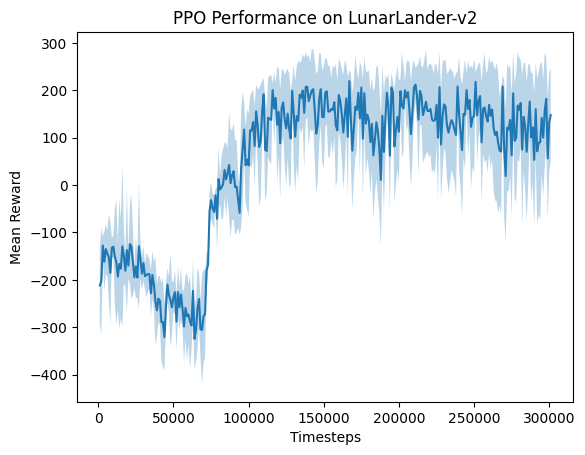

In [9]:
# Load the evaluations.npz file
data = numpy.load('./logs/evaluations.npz')

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps, mean_results - std_results, mean_results + std_results, alpha=0.3)
matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title('PPO Performance on LunarLander-v2')
matplotlib.pyplot.show()